In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 1.4 MB/s 
     |████████████████████████████████| 5.8 MB 32.0 MB/s 
     |████████████████████████████████| 1.3 MB 56.7 MB/s 
     |████████████████████████████████| 182 kB 58.5 MB/s 
     |████████████████████████████████| 7.6 MB 57.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ff1c44ee12a7f085d3d7e8ba613610191bbdd3569c729abd5887a042993f9f62
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from google.colab import drive
# Connect to google drive
drive.mount('/content/gdrive')

# Load data and set labels
#data = pickle.load(open('gdrive/My Drive/Dissertation/formspring_data.pkl', 'rb'))
df = pd.read_csv('gdrive/My Drive/Dissertation/enriched_processed_form+tweet.csv', index_col=0)

Mounted at /content/gdrive


In [ ]:
df.head()

,text,No_of_Characters,No_of_Words,No_of_sentence,label,clean_text,Tokenize_Text,Lemmatized_Text,X,sent_length
0,rape is real..zvasiyana nema jokes about being...,159,32,1,1,rape is real zvasiyana nema jokes about being ...,"['rape', 'is', 'real', 'zvasiyana', 'nema', 'j...","['rape', 'be', 'real', 'zvasiyana', 'nema', 'j...",rape be real zvasiyana nema joke about be drin...,29
1,You never saw any celebrity say anything like ...,136,28,1,1,you never saw any celebrity say anything like ...,"['you', 'never', 'saw', 'any', 'celebrity', 's...","['you', 'never', 'saw', 'any', 'celebrity', 's...",you never saw any celebrity say anything like ...,21
2,"@ManhattaKnight I mean he's gay, but he uses g...",80,17,1,1,mean he is gay but he uses gendered slurs and ...,"['mean', 'he', 'is', 'gay', 'but', 'he', 'uses...","['mean', 'he', 'be', 'gay', 'but', 'he', 'use'...",mean he be gay but he use gendered slur and ma...,13
3,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...,66,11,1,1,feminazi,['feminazi'],['feminazi'],feminazi,1
4,Rape is rape. And the fact that I read one pos...,273,63,4,1,rape is rape and the fact that read one post a...,"['rape', 'is', 'rape', 'and', 'the', 'fact', '...","['rape', 'be', 'rape', 'and', 'the', 'fact', '...",rape be rape and the fact that read one post a...,54


In [ ]:
X = df['clean_text']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40, stratify=y)

In [ ]:
y_train.value_counts()

1    17598
0    17573
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

1    1955
0    1953
Name: label, dtype: int64

In [ ]:
train_sentences = X_train.values
test_sentences = X_test.values

In [ ]:
len(X_train)

35171

In [ ]:
train_sentences = train_sentences.tolist()
test_sentences = test_sentences.tolist()

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#Sentences are encoded by calling model.encode()
train_embeddings = model.encode(train_sentences)

In [ ]:
test_embeddings = model.encode(test_sentences)

In [ ]:
X_train = train_embeddings

In [ ]:
X_test = test_embeddings

In [ ]:
from sklearn. model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
from sklearn.svm import SVC
#Initialising the model
svm1 =  SVC(random_state=1)
#Fitting SVM model using resampled data from ROS
svm_model1 = svm1.fit(X_train,y_train)

In [ ]:
pred_svm1 = svm_model1.predict(X_test)

In [ ]:
#svm_tf_idf = SVC()
svm2 = SVC(C=5, kernel='rbf', degree=3, gamma=0.5, random_state=10)
svm_model2 = svm2.fit(X_train, y_train)

In [ ]:
pred_svm2 = svm_model2.predict(X_test)

In [ ]:
#Evaluating the model before GridSearchCV:
scores1 = cross_val_score(svm_model1, X_train, y_train, cv=5)
#scores2 = cross_val_score(svm_model2, X_train, y_train, cv=5)

print("Accuracy of first SVM model:",round(scores1.mean()*100,2),"%")
#print("Accuracy of second SVM model:",round(scores2.mean()*100,2),"%")

Accuracy of first SVM model: 85.06 %


In [ ]:
# svc =  SVC(C=1, gamma=0.001, random_state=1)
# #Fitting SVM model using resampled data from ROS
# svm_model = svc.fit(X_train,y_train)

# pred_svm = svm_model.predict(X_test)

# #Evaluating the model before GridSearchCV:
# scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# print("Accuracy of SVM model after tuning parameters:",round(scores.mean()*100,2),"%")

In [ ]:
#Defining function to update classification reports in pandas dataframes
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report
    return df_classification_report

Evaluation Metrics for SVM model:


,precision,recall,f1-score,support
0,0.825779,0.895545,0.859248,1953.000000
1,0.886034,0.811253,0.846996,1955.000000
accuracy,0.853378,0.853378,0.853378,0.853378
macro avg,0.855906,0.853399,0.853122,3908.000000
weighted avg,0.855922,0.853378,0.853119,3908.000000


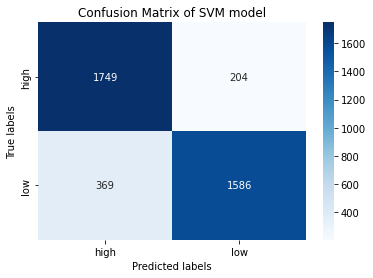

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Defining variables for confusion matrices:
svm_conf = confusion_matrix(y_test,pred_svm1)

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(svm_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVM model')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
svc_report = get_classification_report(y_test,pred_svm1) 
print("================================")
print("Evaluation Metrics for SVM model:")
print("================================")
svc_report

Evaluation Metrics for SVC model


,precision,recall,f1-score,support
0,0.839665,0.87148,0.855276,1953.00000
1,0.866560,0.83376,0.849844,1955.00000
accuracy,0.852610,0.85261,0.852610,0.85261
macro avg,0.853112,0.85262,0.852560,3908.00000
weighted avg,0.853119,0.85261,0.852559,3908.00000


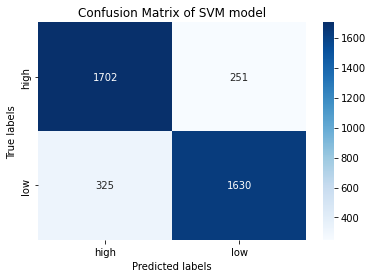

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Defining variables for confusion matrices:
svm_conf = confusion_matrix(y_test,pred_svm2)

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(svm_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVM model')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
svc_report = get_classification_report(y_test,pred_svm2) 
print("================================")
print("Evaluation Metrics for SVC model")
print("================================")
svc_report

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=50)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [ ]:
%time
rf_pred = rf.predict(X_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


Evaluation Metrics for RFC model


,precision,recall,f1-score,support
0,0.791469,0.855095,0.822053,1953.000000
1,0.842603,0.774936,0.807354,1955.000000
accuracy,0.814995,0.814995,0.814995,0.814995
macro avg,0.817036,0.815015,0.814703,3908.000000
weighted avg,0.817049,0.814995,0.814700,3908.000000


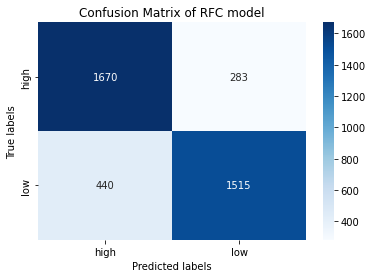

In [ ]:
rf_conf = confusion_matrix(y_test,rf_pred)

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(rf_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of RFC model')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
rf_report = get_classification_report(y_test,rf_pred) 
print("================================")
print("Evaluation Metrics for RFC model")
print("================================")
rf_report

In [ ]:
#Evaluating the model before GridSearchCV:
scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Accuracy of RF model: ",round(scores.mean()*100,2),"%")

Accuracy of RF model:  81.21 %
